# Benchmark Data Treatment Of The IP (RR) And ILP (RR Improved)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rr_df = pd.read_csv('./data/fabio_rr_results.csv')

In [3]:
rr_imp_df = pd.read_csv('./data/fabio_rr_imp_results.csv')

In [4]:
#concatenate full name
rr_imp_df['name'] = rr_imp_df['graph_type'].astype(str).str.cat(rr_imp_df[['size', 'probabilities']].astype(str), sep='_')

In [5]:
#concatenate full name
rr_df['name'] = rr_df['graph_type'].astype(str).str.cat(rr_df[['size', 'probabilities']].astype(str), sep='_')

## Ploting

<Figure size 1800x2500 with 0 Axes>

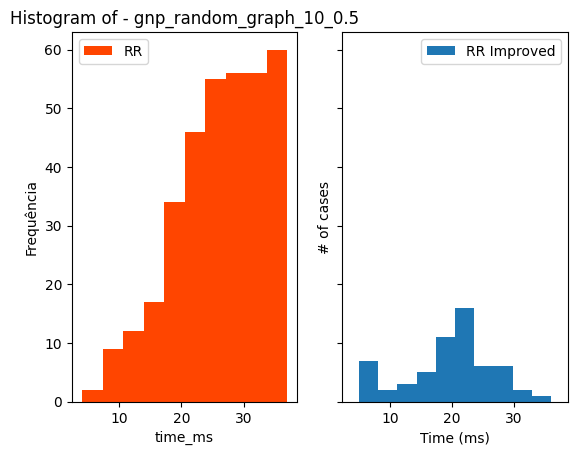

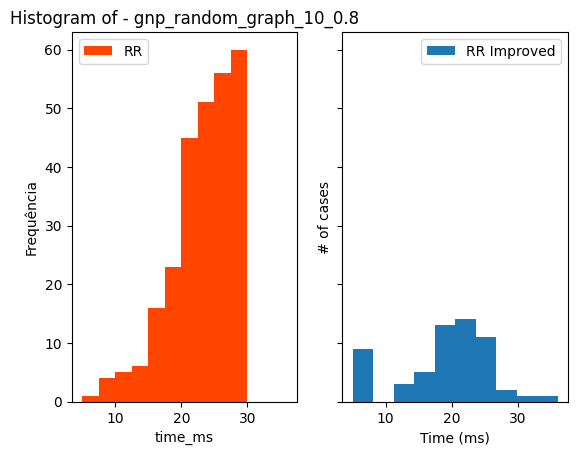

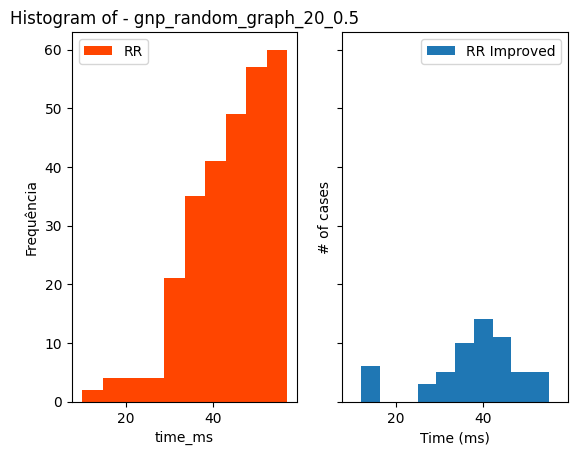

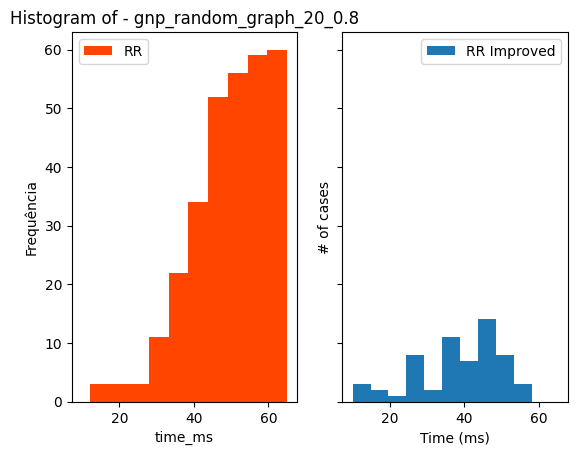

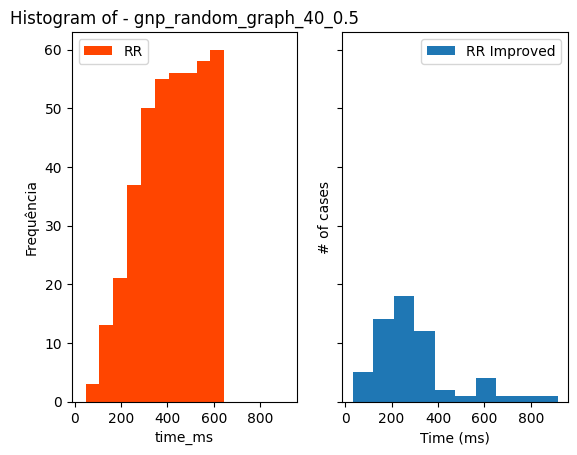

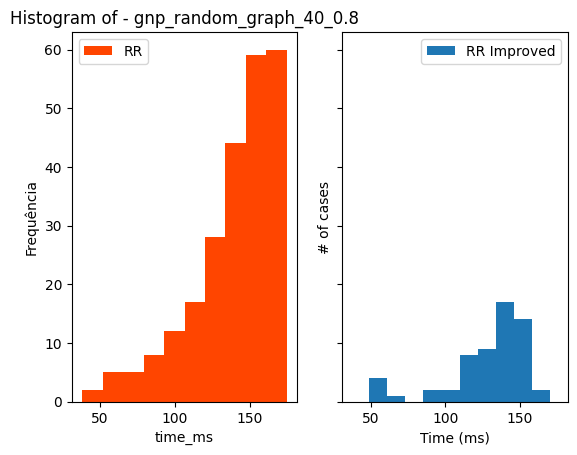

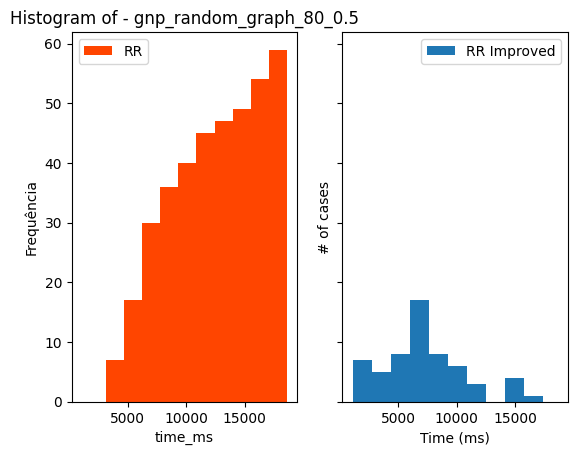

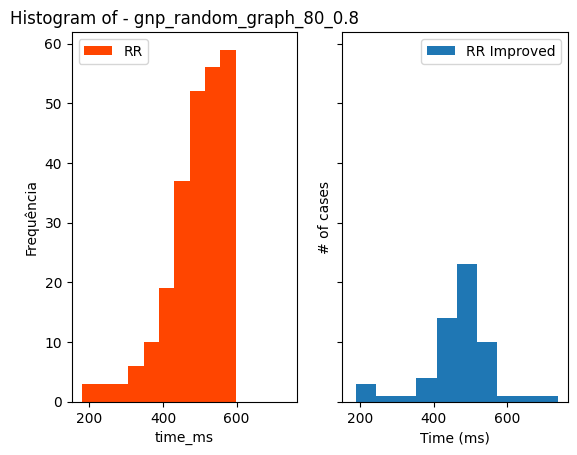

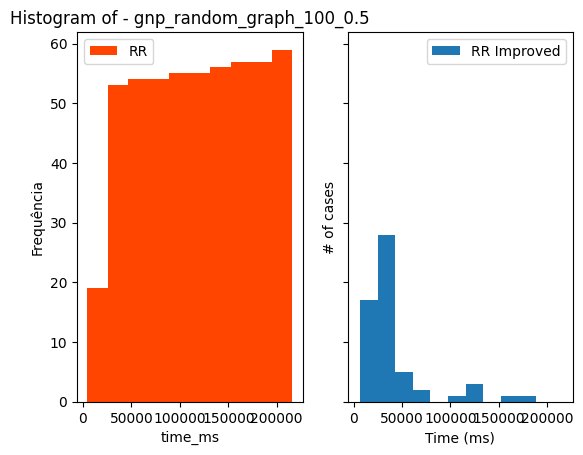

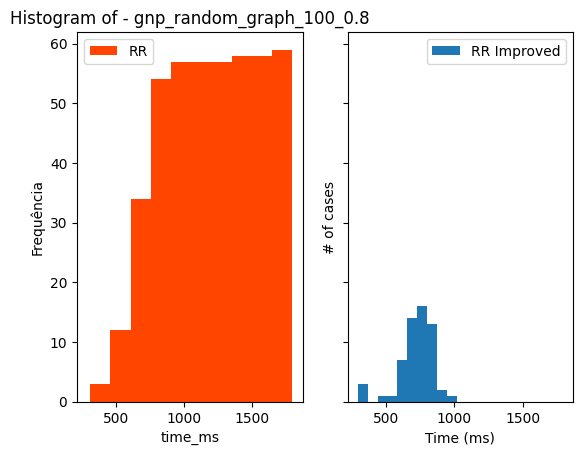

In [6]:
types = rr_df['name'].unique()
imp_type = rr_imp_df['name'].unique()
zipped_types = zip(types, imp_type)

plt.figure(figsize=(18, 25))

for t, it in zipped_types:

    # Plotar histograma para rr_imp_df
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)


    df_rr_filtered = rr_df[rr_df['name'] == it]
    ax1.hist(df_rr_filtered['time_ms'], label='RR', color='orangered', cumulative=True)
    ax1.set_title(f'Histogram of - {t}')
    ax1.set_xlabel('time_ms')
    ax1.set_ylabel('Frequência')
    ax1.legend()
    
    df_rr_imp_filtered = rr_imp_df[rr_imp_df['name'] == t]
    ax2.hist(df_rr_imp_filtered['time_ms'], label='RR Improved')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('# of cases')
    ax2.legend()

<Figure size 1800x2500 with 0 Axes>

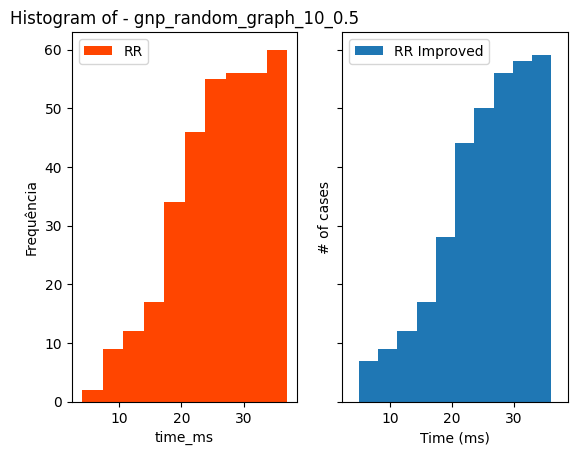

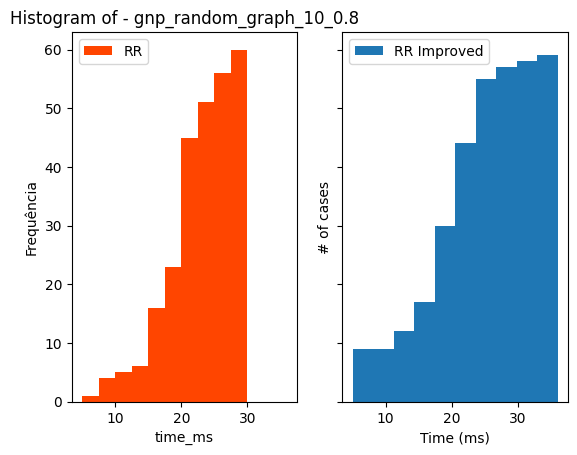

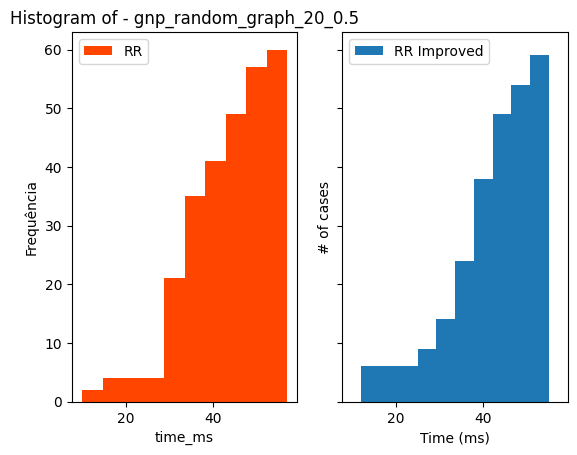

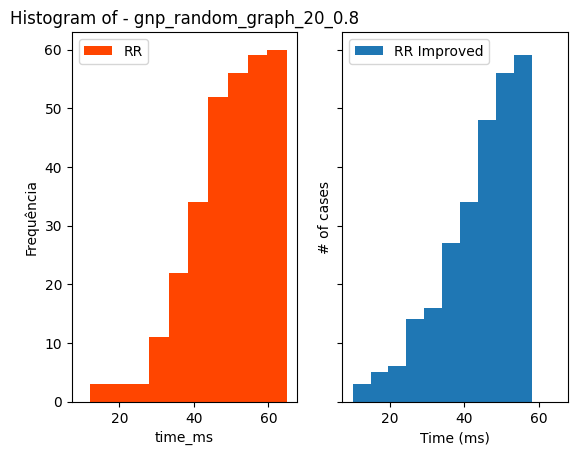

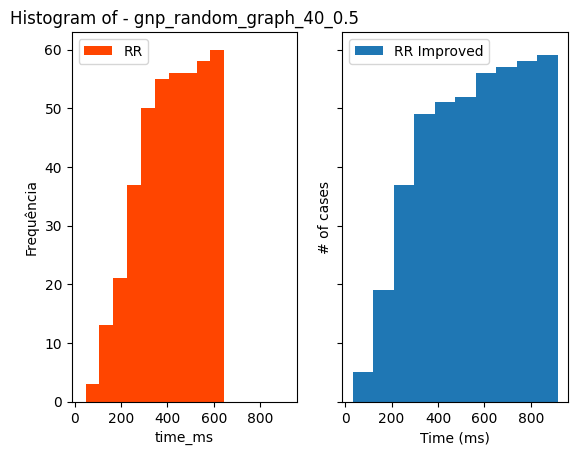

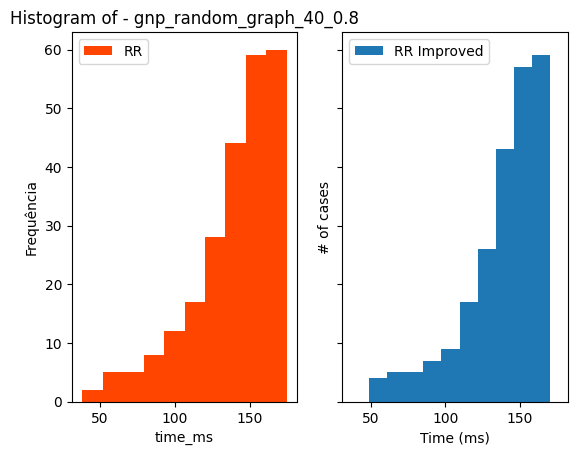

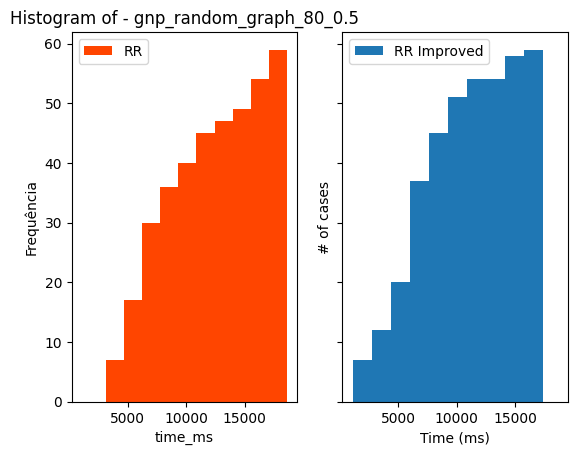

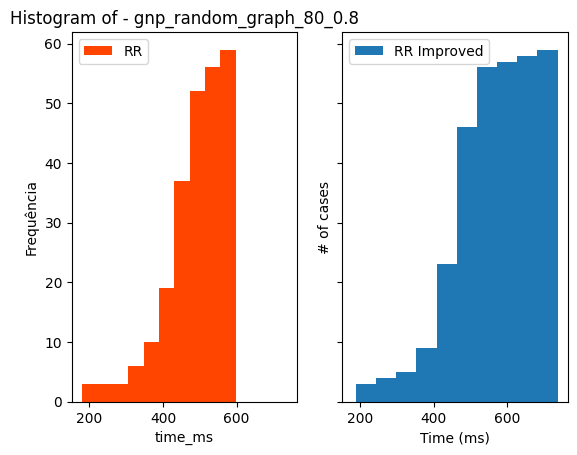

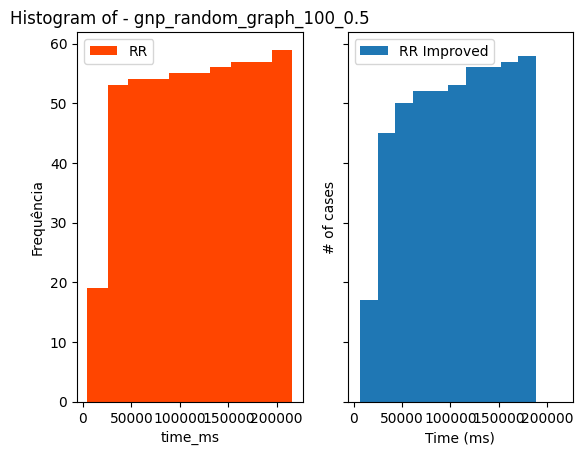

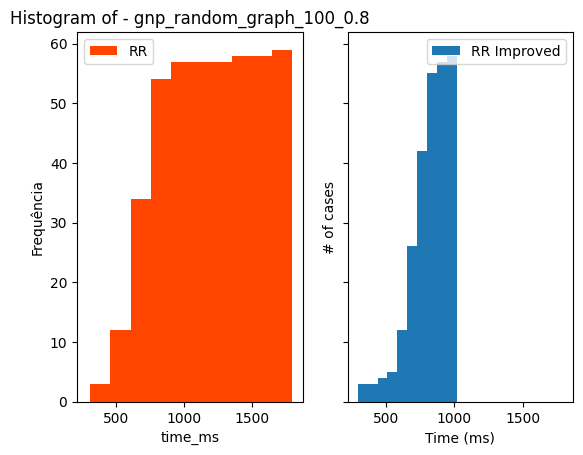

In [7]:
types = rr_df['name'].unique()
imp_type = rr_imp_df['name'].unique()
zipped_types = zip(types, imp_type)

plt.figure(figsize=(18, 25))

for t, it in zipped_types:

    # Plotar histograma para rr_imp_df
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)


    df_rr_filtered = rr_df[rr_df['name'] == it]
    ax1.hist(df_rr_filtered['time_ms'], label='RR', color='orangered', cumulative=True)
    ax1.set_title(f'Histogram of - {t}')
    ax1.set_xlabel('time_ms')
    ax1.set_ylabel('Frequência')
    ax1.legend()
    
    df_rr_imp_filtered = rr_imp_df[rr_imp_df['name'] == t]
    ax2.hist(df_rr_imp_filtered['time_ms'], label='RR Improved', cumulative=True)
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('# of cases')
    ax2.legend()